## 设置Matplotlib中文字体

In [359]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [360]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [361]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2025-04-27 16:30:30--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  17.3MB/s    用时 0.6s    

2025-04-27 16:30:31 (17.3 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



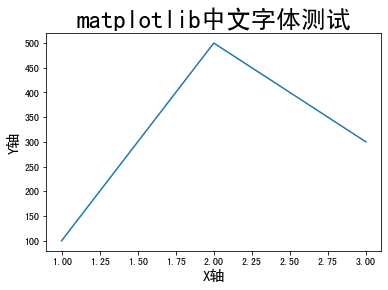

In [362]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [363]:
import os
# os.chdir('mmsegmentation')

In [364]:
os.getcwd()

'/home/featurize/work/MMSegmentation_Tutorials-main/20230215/【D1】Kaggle代码实战-肾小球切片语义分割'

## 导入工具包

In [365]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [366]:
# 日志文件路径
log_path = './work_dirs/tutorial/20250427_133131/vis_data/scalars.json'

In [367]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [368]:
len(json_list)

540

In [369]:
eval(json_list[4])

{'lr': 0.00994451655954398,
 'data_time': 0.01031477451324463,
 'loss': 0.04556698077358305,
 'decode.loss_ce': 0.031027480168268083,
 'decode.acc_seg': 99.60492706298828,
 'aux.loss_ce': 0.014539500954560936,
 'aux.acc_seg': 99.19650268554688,
 'time': 0.32602629661560056,
 'iter': 250,
 'memory': 3965,
 'step': 250}

In [370]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [371]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009989,0.011670,0.084985,0.059191,99.761345,0.025794,99.761345,0.327361,50.0,6140.0,50.0
1,0.009978,0.010748,0.065764,0.043553,97.899284,0.022212,97.899284,0.327385,100.0,3965.0,100.0
2,0.009967,0.010712,0.079972,0.056806,98.685226,0.023166,97.728539,0.326498,150.0,3965.0,150.0
3,0.009956,0.010764,0.059092,0.040915,98.692726,0.018177,98.692726,0.326975,200.0,3965.0,200.0
4,0.009945,0.010315,0.045567,0.031027,99.604927,0.014540,99.196503,0.326026,250.0,3965.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...
475,0.004489,0.011544,0.010956,0.007353,99.885452,0.003604,99.847359,0.329482,23800.0,3965.0,23800.0
476,0.004477,0.011449,0.008539,0.005649,99.762505,0.002890,99.771935,0.329353,23850.0,3965.0,23850.0
477,0.004464,0.011485,0.011071,0.006711,100.000000,0.004361,99.993248,0.330178,23900.0,3965.0,23900.0
478,0.004452,0.011834,0.004531,0.002904,100.000000,0.001626,100.000000,0.330697,23950.0,3965.0,23950.0


In [372]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,98.70,73.08,90.61,81.86,81.86,76.31,90.61,0.003669,0.060753,400.0
1,99.42,82.41,88.29,89.40,89.40,90.57,88.29,0.003208,0.059524,800.0
2,98.55,73.02,95.25,81.83,81.83,74.73,95.25,0.003310,0.062115,1200.0
3,99.50,85.02,91.96,91.24,91.24,90.54,91.96,0.003392,0.062363,1600.0
4,99.55,86.39,92.78,92.16,92.16,91.56,92.78,0.003309,0.060876,2000.0
5,99.64,88.50,92.51,93.52,93.52,94.59,92.51,0.003333,0.060582,2400.0
6,99.48,82.42,84.53,89.40,89.40,95.93,84.53,0.003008,0.057402,2800.0
7,99.64,88.03,90.39,93.23,93.23,96.51,90.39,0.003293,0.061323,3200.0
8,99.61,86.86,88.73,92.47,92.47,97.04,88.73,0.003344,0.061936,3600.0
9,99.67,89.07,92.59,93.89,93.89,95.27,92.59,0.003413,0.063109,4000.0


## 导出训练日志表格

In [373]:
df_train.to_csv('./mmsegmentation/图表/训练日志-训练集.csv', index=False)
df_test.to_csv('./mmsegmentation/图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [406]:
from matplotlib import colors as mcolors
import random
random.seed(253)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [407]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

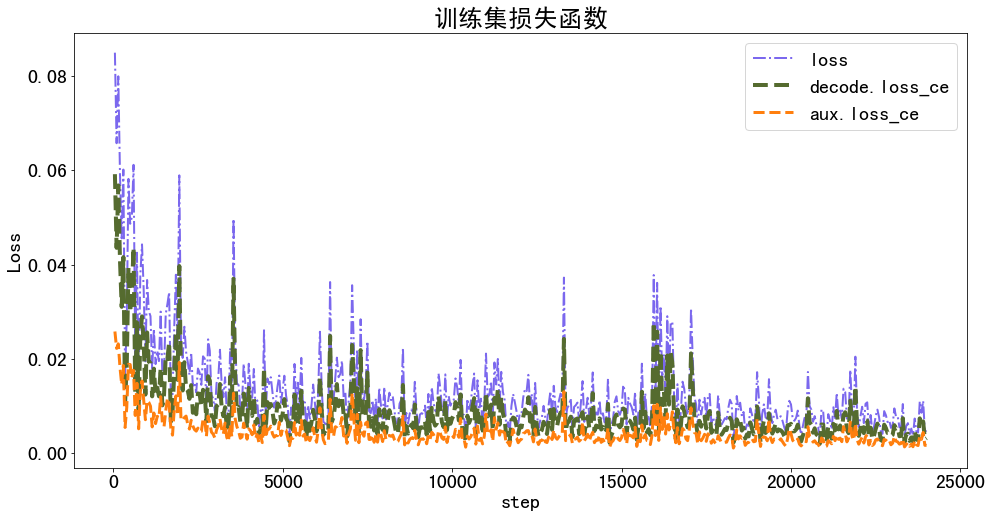

In [408]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集损失函数.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 训练集准确率

In [409]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

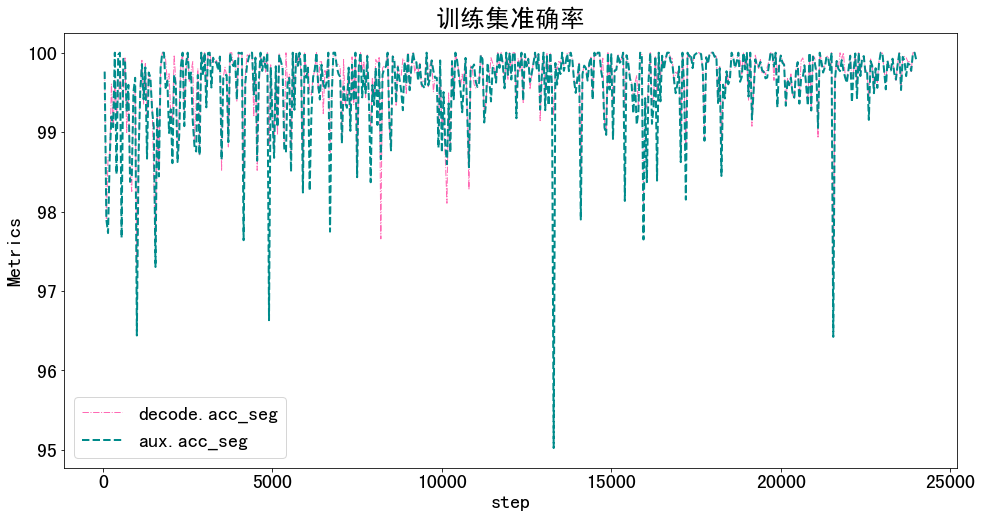

In [410]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/训练集准确率.pdf', dpi=240, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [411]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [412]:
metrics = ['aAcc', 'mIoU', 'mRecall', 'mPrecision', 'mFscore', 'mDice']#, 'mAcc']

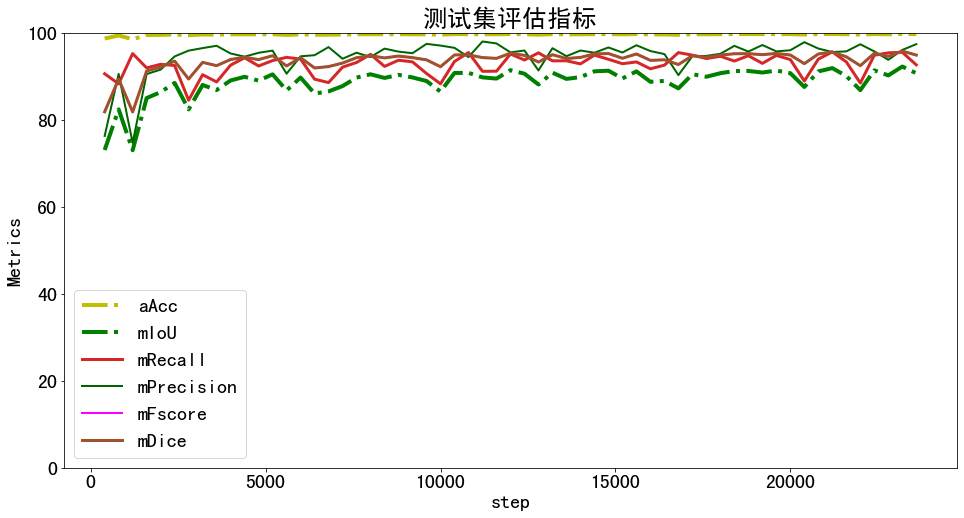

In [413]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('./mmsegmentation/图表/测试集分类评估指标.pdf', dpi=240, bbox_inches='tight')

plt.show()